In [34]:
import pandas as pd
import numpy as np

import dash
import dash_core_components as dcc
import dash_html_components as html

import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.cluster import KMeans

import time

In [2]:
df = pd.read_csv('df5_log2_ratio.csv', index_col = ['locus_tag'])

In [3]:
df.head()

,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,FM21_no-lim_5.4/day_R2,FM12_CH4-lim_3.0/day,FM12_CH4-lim_3.0/day_R1,FM14_CH4-lim_3.0/day,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,0.192390,0.399056,0.226044,0.031919,-0.259212,0.024218,-0.375939,-0.662138,-0.664962,-0.340741,...,-0.169520,-0.714689,0.375098,0.230305,0.045003,-0.026448,-0.136418,-0.239295,-0.400820,-0.313184
MBURv2_100002,-0.405649,-0.309960,-0.581343,-1.050033,-1.235838,-0.529028,-1.161497,-1.274654,-1.243865,-1.715639,...,-2.717254,-2.980653,-0.202880,-2.423929,-0.404706,-1.477967,-1.135770,-1.251409,-1.323482,-1.384361
MBURv2_10001,-0.349818,-0.432159,-0.748817,-1.126519,-1.176547,-0.974533,-1.157318,-1.812235,-1.774428,-1.724550,...,-2.819275,-2.497711,-1.428475,-1.240548,-1.345572,-1.410063,-2.228331,-1.943554,-2.684422,-2.403920
MBURv2_10002,-0.429268,0.644220,0.573052,0.232233,-0.060841,0.395560,-0.097191,-1.325059,-1.769956,-0.577714,...,0.187883,-0.253695,0.061458,-0.387287,0.545962,0.114193,-0.076866,-0.000965,-0.226299,-0.229278
MBURv2_10003,-0.475120,-0.160000,-0.398919,-0.153891,-0.364631,-0.543518,-0.403339,-1.106884,-1.116421,-0.932348,...,-0.737528,-1.391160,-0.835128,-1.039627,-0.662973,-0.845406,-1.228497,-1.149969,-1.464724,-1.412012


### Cluster id

In [ ]:
def kmeans_cluster(gene):
    """

    """
    X = df

    kmeans = KMeans(n_clusters= 19 , max_iter=300, random_state=4) 
    kmeans.fit(X)
    
    labels_kmeans = kmeans.labels_
    df_clusterid = pd.DataFrame(labels_kmeans, index = df.index)
    df_clusterid.rename(columns = {0:"cluster"}, inplace = True)
    df_clusters = pd.concat([df, df_clusterid], axis = 1)
    
    genes_clusterid = df_clusterid.loc[gene]
    
    return genes_clusterid 

In [ ]:
kmeans_cluster('MBURv2_10007')

### Cluster Overview

**1. Cluster Size**

In [ ]:
def cluster_size(k):
    """

    """
    X = df

    kmeans = KMeans(n_clusters= k , max_iter=300, random_state=4) 
    kmeans.fit(X)
    
    labels_kmeans = kmeans.labels_
    df_clusterid = pd.DataFrame(labels_kmeans, index = df.index)
    df_clusterid.rename(columns = {0:"cluster"}, inplace = True)
    df_clusters = pd.concat([df, df_clusterid], axis = 1)
    
    #genes_clusterid = df_clusterid.loc[gene]
    
    count = df_clusters.groupby('cluster').count().iloc[:,0]
    
    fig = plt.figure(figsize=(15, 10))

    x_axis = list(count.index)
    y = count.values

    plt.bar(x_axis, y)

    plt.xticks(list(range(k)),fontsize=14)
    plt.xlabel('cluster id',fontsize=20)
    plt.ylabel('number od genes in each cluster',fontsize=20)
    plt.title('Cluster Size Overview',fontsize=24)
   
    return  plt.show()

In [ ]:
cluster_size(20)

**2. Cluster Profile Overview**

In [ ]:
def draw_clust_means(k, n_rows, n_cols):
    """
    Draw scatter plot of mean gene expression level for genes in that cluster.
    Will include 1 standard deviation error margin within the plot. 
    Plot will be saves as pdf file. 
    
    
    k: k value in k-means clustering model
    n_rows: int value for the subplot grid
    n_cols: int value for subplot grid
    
    """
    
    X = df

    kmeans = KMeans(n_clusters= k , max_iter=300, random_state=4) 
    kmeans.fit(X)
    
    labels_kmeans = kmeans.labels_
    df_clusterid = pd.DataFrame(labels_kmeans, index = df.index)
    df_clusterid.rename(columns = {0:"cluster"}, inplace = True)
    df_clusters = pd.concat([df, df_clusterid], axis = 1)
    
    count = df_clusters.groupby("cluster").count().iloc[:,0]
    
    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df_clusters.columns)-1))
    x_ticks = df_clusters.loc[:, df_clusters.columns != "cluster"]
    
    
    y_stdev = df_clusters.groupby("cluster").std()
    y_mean = df_clusters.groupby("cluster").mean()
    
    y_low = y_mean.subtract(y_stdev, fill_value=0)
    y_high = y_mean.add(y_stdev, fill_value = 0)
    
    for i in range(y_mean.shape[0]):
        y = y_mean.values[i]
        y_hi = y_high.values[i]
        y_lo = y_low.values[i]
        
        title_str = "Cluster #"+ str(i) + "Profile Overview (including " + str(count[i]) + " genes)"
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/CH3OH)")
        
        ax.plot(x_axis, y, "b-")
        ax.plot(x_axis, y_hi, "b-", alpha = 0.5)
        ax.plot(x_axis, y_lo, "b-", alpha = 0.5 )
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    #fig.savefig("cluster_means.pdf")

In [ ]:
draw_clust_means(15, 10, 6 )

### 3. Choose Optimal  K Value

### Elbow Method

In [4]:
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist

In [8]:
K = range(1, 31)
KM = [KMeans(n_clusters=k).fit(df) for k in K] 
centroids = [k.cluster_centers_ for k in KM]
k_euclid = [cdist(df.values, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

wss = [sum(d**2)/1000 for d in dist]

In [22]:
dwss = [wss[i+1] - wss[i] for i in range(len(wss)-1)]

In [27]:
dwss_range = range(1,30)

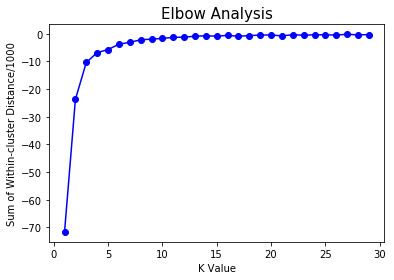

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dwss_range, dwss, 'bo-')
    
plt.xlabel('K Value', fontsize = 10)
plt.ylabel('Difference of Sum of Within-cluster Distance to Next Lower K/1000', fontsize = 10)
plt.title('Elbow Analysis', fontsize = 15)
plt.show()

In [33]:
def elbow_method_evaluation(n):
    """
    n: the maximum of k value
    
    """
    # Fit the kmeans model for k in a certain range
    K = range(1, n+1)
    KM = [KMeans(n_clusters=k).fit(df) for k in K] 
    # Pull out the cluster centroid for each model 
    centroids = [k.cluster_centers_ for k in KM]
    
    # Calculate the distance between each data point and the centroid of its cluster
    k_euclid = [cdist(df.values, cent, 'euclidean') for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    
    # Total within sum of square
    wss = [sum(d**2)/1000 for d in dist]
    # The total sum of square
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    # The between-clusters sum of square
    bss = tss - wss
    
    # Difference of sum of within cluster distance to next smaller k
    dwss = [wss[i+1] - wss[i] for i in range(len(wss)-1)]
    dwss.insert(0, 0)
    
    # elbow curve
    fig = plt.figure(figsize=(10,12))
    ax1 = fig.add_subplot(211)
    ax1.plot(K, wss, 'bo-')
    ax1.set_xlabel('K Value', fontsize = 10)
    ax1.set_ylabel('Sum of Within-cluster Distance/1000', fontsize = 10)
    
    ax2 = fig.add_subplot(212)
    ax2.plot(K,dwss, 'bo-')
    ax2.set_xlabel('K Value', fontsize = 10)
    ax2.set_ylabel('Difference of sum of within cluster distance to next smaller k/1000', fontsize = 10)
    #plt.title('Elbow Analysis', fontsize = 15)
    plt.show()

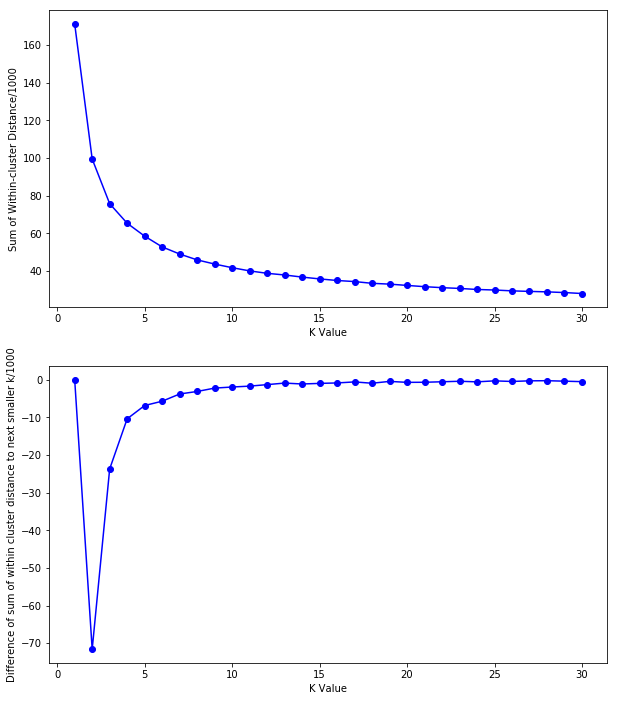

Running Time is  21.199216842651367 s


In [36]:
start = time.time()

elbow_method_evaluation(30)

end = time.time()
print('Running Time is ', (end - start),'s')

### Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
k_values_array = np.array([])

In [ ]:
def silhouette_score_rev01(df,k):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    k_values_array = np.array([])
    silhouette_array = np.array([])

    #k_list = [2,4,6,8,10,12]
    k_list = list(range(2,k+2,1))

    for i in k_list:
        #K-means for range of clusters 
        kmeans = KMeans(n_clusters=i, max_iter=300, random_state=3) #15 clusters and random_stat = 3 gives good cluster
        kmeans.fit(df)
        labels_kmeans = kmeans.labels_
        #Silhouette score for every k computed
        silhouette_ave = silhouette_score(df.values, labels_kmeans)
    
        #x and y axis to plot k value and silhouette score 
        k_values_array = np.append(k_values_array, [int(i)])
        silhouette_array = np.append(silhouette_array, [silhouette_ave])
    
    
    ax.set_ylabel("Silhouette coefficient", fontsize = 10)
    ax.set_xlabel("K", fontsize = 10)
    ax.set_title("Silhouette Analysis", fontsize = 15)
    
    plt.plot(k_values_array, silhouette_array, "bo")

In [ ]:
silhouette_score_rev01(df,30)

In [ ]:
k_values_array = np.array([])
silhouette_array = np.array([])

k_list = list(range(2,22,1))

for i in k_list:
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=3) #15 clusters and random_stat = 3 gives good cluster
    kmeans.fit(df)
    labels_kmeans = kmeans.labels_
    #Silhouette score for every k computed
    silhouette_ave = silhouette_score(df.values, labels_kmeans)
    
    #x and y axis to plot k value and silhouette score 
    k_values_array = np.append(k_values_array, [int(i)])
    silhouette_array = np.append(silhouette_array, [silhouette_ave])

In [ ]:
kmeans = KMeans(n_clusters=15, max_iter=300, random_state=3)
kmeans.fit(df)
labels_kmeans = kmeans.labels_
silhouette_ave = silhouette_score(df.values, labels_kmeans)

In [ ]:
silhouette_ave